In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

#Function

In [2]:
def plot_loss(history):
  history_dataframe = pd.DataFrame(history.history)

  min_loss_index = history_dataframe[history_dataframe['loss']==min(history_dataframe['loss'])].index.values
  min_loss = history_dataframe.loc[min_loss_index]['loss']
  min_val_loss_index = history_dataframe[history_dataframe['val_loss']==min(history_dataframe['val_loss'])].index.values
  min_val_loss = history_dataframe.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Minimun Loss :", min_loss)
  print("---------------------------------------")
  print("Minimun Validation Loss :", min_val_loss)

In [3]:
def algo_evaluation(model):
  predictions = model.predict(feature_test)
  predictions = predictions.flatten()

  print("MSE (Mean Squared Error)         -> ", mean_squared_error(label_test, predictions))
  print("MAE (Mean Absolute Error)        -> ", mean_absolute_error(label_test, predictions))
  print("r^2 score                        -> ", r2_score(label_test, predictions))
  print('RMSE (Root Mean Squared Error)   -> ', np.sqrt(mean_squared_error(label_test, predictions)))

In [4]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

#Data Cleaning


In [5]:
dataset = pd.read_csv('/content/drive/My Drive/Colab_Test/Dataset/6. Deep Learning/bottle.csv')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  864863 non-null  int64  
 1   Depthm      864863 non-null  int64  
 2   T_degC      853900 non-null  float64
 3   Salnty      817509 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 26.4 MB


In [7]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
dataset.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [9]:
dataset.isnull().sum()

Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

In [10]:
dataset.replace("?", np.nan, inplace=True)

In [11]:
avg_deg = dataset['T_degC'].astype(float).mean(axis=0)
avg_salnty = dataset['Salnty'].astype(float).mean(axis=0)

In [12]:
dataset['T_degC'].replace(np.nan, avg_deg, inplace=True)
dataset['Salnty'].replace(np.nan, avg_salnty, inplace=True)

In [13]:
dataset.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
dtype: int64

In [14]:
dataset[['Depthm']] = dataset[['Depthm']].astype(float)

In [15]:
dataset.head()

,Depthm,T_degC,Salnty
0,0.0,10.50,33.440
1,8.0,10.46,33.440
2,10.0,10.46,33.437
3,19.0,10.45,33.420
4,20.0,10.45,33.421


#EDA

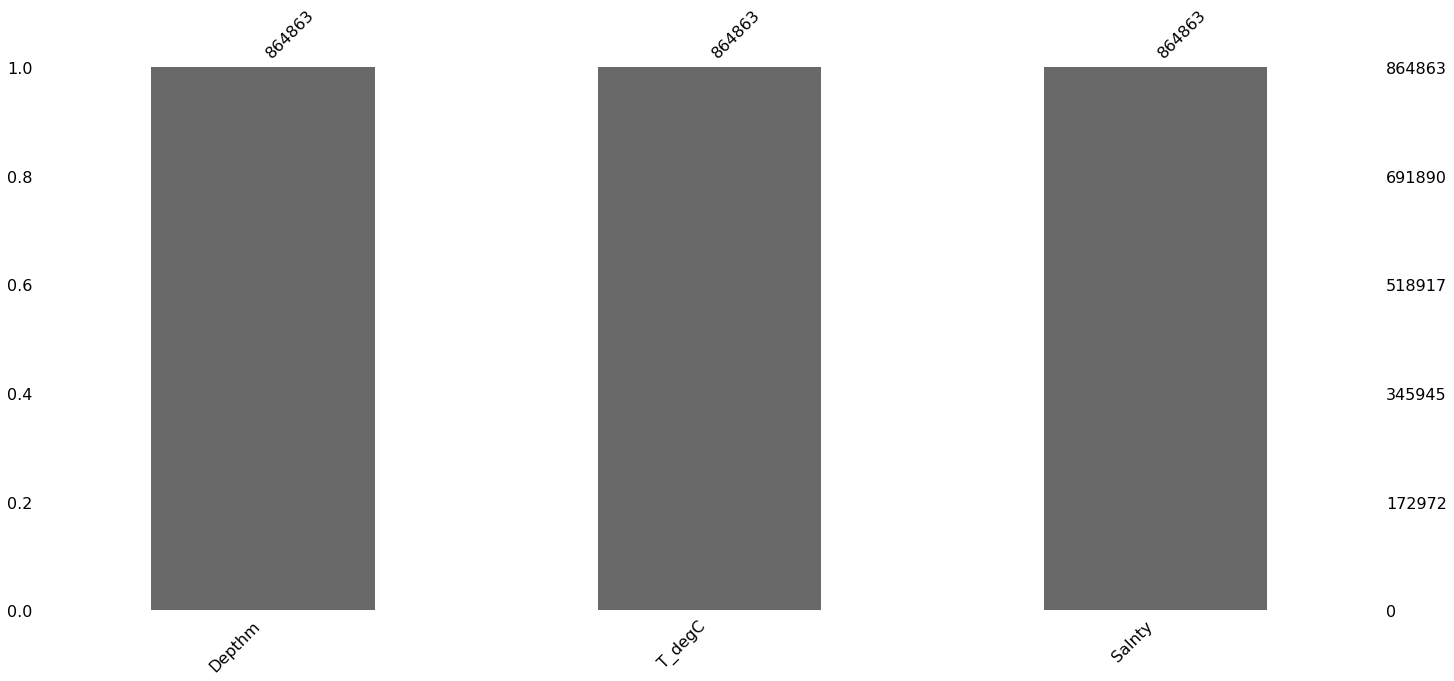

In [16]:
pd.options.display.max_columns = None
import missingno as msno

msno.bar(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c068314a8>,
      dtype=object)

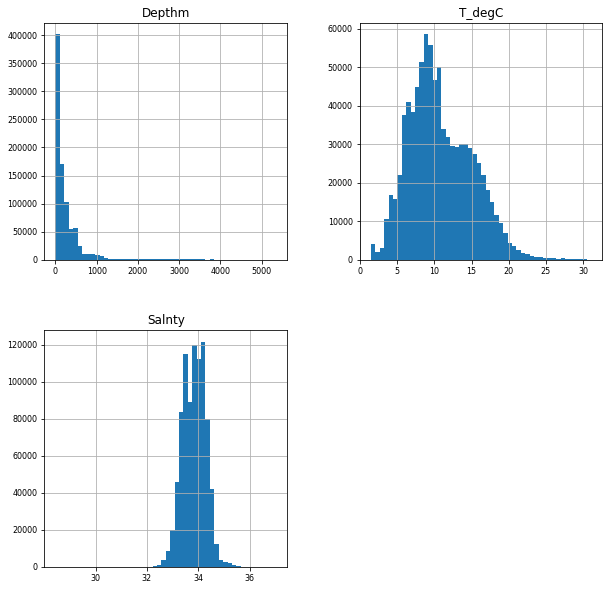

In [17]:
dataset.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

In [18]:
corr = dataset.corr()

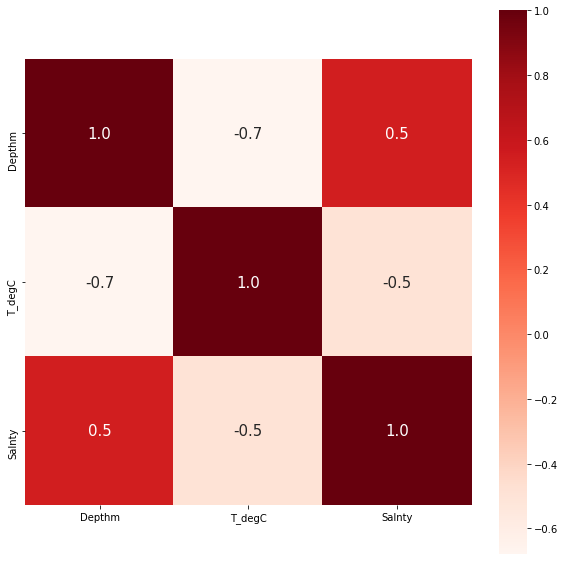

In [19]:
plt.figure(figsize=(10,10))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

#Split Data

In [20]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [21]:
label = dataset['Salnty']
features = dataset.drop(['Salnty'], axis=1)

In [22]:
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [23]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

In [24]:
model = LinearRegression()
model.fit(feature_train, label_train)
algo_evaluation(model)

MSE (Mean Squared Error)         ->  0.6832035786398614
MAE (Mean Absolute Error)        ->  0.5854716355968662
r^2 score                        ->  0.3185370006447811
RMSE (Root Mean Squared Error)   ->  0.8265612975695519


#Deep Learning

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf, random

##Baseline Model

In [26]:
base_model = Sequential()
base_model.add(Dense(200, input_dim=2, kernel_initializer='normal', activation='relu'))
base_model.add(Dense(1, kernel_initializer='normal'))

base_model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
base_history = base_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 84s 1ms/step - loss: 0.3665 - val_loss: 0.3569
Epoch 2/100
81081/81081 [==============================] - 86s 1ms/step - loss: 0.3532 - val_loss: 0.3601
Epoch 3/100
81081/81081 [==============================] - 88s 1ms/step - loss: 0.3512 - val_loss: 0.3623
Epoch 4/100
81081/81081 [==============================] - 87s 1ms/step - loss: 0.3501 - val_loss: 0.3504
Epoch 5/100
81081/81081 [==============================] - 88s 1ms/step - loss: 0.3488 - val_loss: 0.3502
Epoch 6/100
81081/81081 [==============================] - 87s 1ms/step - loss: 0.3481 - val_loss: 0.3620
Epoch 7/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.3476 - val_loss: 0.3496
Epoch 8/100
81081/81081 [==============================] - 87s 1ms/step - loss: 0.3473 - val_loss: 0.3479
Epoch 9/100
81081/81081 [==============================] - 87s 1ms/step - loss: 0.3469 - val_loss: 0.3498
Epoch 10/100
81081/81081 [====================

In [28]:
predictions = base_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(base_model)

MSE (Mean Squared Error)         ->  0.34687518593244604
MAE (Mean Absolute Error)        ->  0.39246179738568676
r^2 score                        ->  0.6540085385998413
RMSE (Root Mean Squared Error)   ->  0.588961107317322


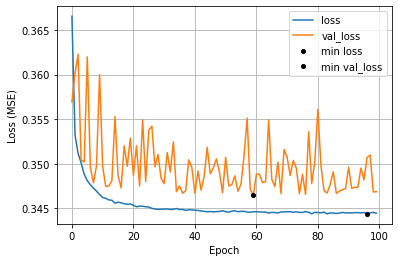

Minimun Loss : 96    0.344383
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 59    0.346461
Name: val_loss, dtype: float64


In [29]:
plot_loss(base_history)

##Deeper Model

In [30]:
deeper_model = Sequential()
deeper_model.add(Dense(200, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(100, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
history_deeper_model = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 108s 1ms/step - loss: 0.3529 - val_loss: 0.3516
Epoch 2/100
81081/81081 [==============================] - 115s 1ms/step - loss: 0.3449 - val_loss: 0.3468
Epoch 3/100
81081/81081 [==============================] - 108s 1ms/step - loss: 0.3434 - val_loss: 0.3509
Epoch 4/100
81081/81081 [==============================] - 107s 1ms/step - loss: 0.3427 - val_loss: 0.3459
Epoch 5/100
81081/81081 [==============================] - 111s 1ms/step - loss: 0.3421 - val_loss: 0.3457
Epoch 6/100
81081/81081 [==============================] - 109s 1ms/step - loss: 0.3416 - val_loss: 0.3441
Epoch 7/100
81081/81081 [==============================] - 112s 1ms/step - loss: 0.3414 - val_loss: 0.3483
Epoch 8/100
81081/81081 [==============================] - 112s 1ms/step - loss: 0.3412 - val_loss: 0.3467
Epoch 9/100
81081/81081 [==============================] - 108s 1ms/step - loss: 0.3412 - val_loss: 0.3436
Epoch 10/100
81081/81081 [===========

In [32]:
predictions = deeper_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(deeper_model)

MSE (Mean Squared Error)         ->  0.34254712007377214
MAE (Mean Absolute Error)        ->  0.39325251228725555
r^2 score                        ->  0.6583255779621505
RMSE (Root Mean Squared Error)   ->  0.5852752515473144


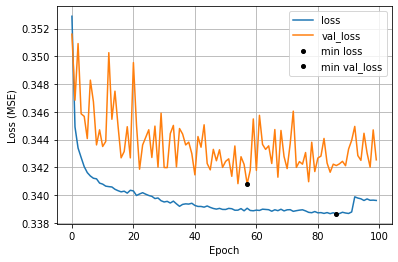

Minimun Loss : 86    0.33865
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 57    0.340813
Name: val_loss, dtype: float64


In [33]:
plot_loss(history_deeper_model)

##Wider Model

In [34]:
wider_model = Sequential()
wider_model.add(Dense(200, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
history_wider_model = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 91s 1ms/step - loss: 0.3687 - val_loss: 0.3621
Epoch 2/100
81081/81081 [==============================] - 88s 1ms/step - loss: 0.3530 - val_loss: 0.3509
Epoch 3/100
81081/81081 [==============================] - 88s 1ms/step - loss: 0.3502 - val_loss: 0.3643
Epoch 4/100
81081/81081 [==============================] - 91s 1ms/step - loss: 0.3492 - val_loss: 0.3576
Epoch 5/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.3485 - val_loss: 0.3547
Epoch 6/100
81081/81081 [==============================] - 86s 1ms/step - loss: 0.3479 - val_loss: 0.3518
Epoch 7/100
81081/81081 [==============================] - 88s 1ms/step - loss: 0.3473 - val_loss: 0.3488
Epoch 8/100
81081/81081 [==============================] - 86s 1ms/step - loss: 0.3470 - val_loss: 0.3470
Epoch 9/100
81081/81081 [==============================] - 89s 1ms/step - loss: 0.3465 - val_loss: 0.3521
Epoch 10/100
81081/81081 [====================

In [36]:
predictions = wider_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(wider_model)

MSE (Mean Squared Error)         ->  0.35169436793889086
MAE (Mean Absolute Error)        ->  0.4028990802691443
r^2 score                        ->  0.6492016342930917
RMSE (Root Mean Squared Error)   ->  0.5930382516658523


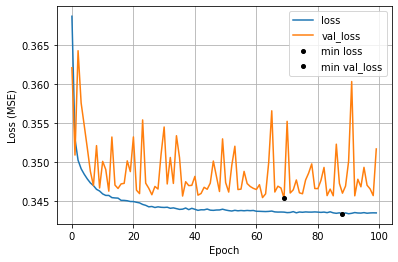

Minimun Loss : 88    0.34337
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 69    0.345362
Name: val_loss, dtype: float64


In [37]:
plot_loss(history_wider_model)

#Kesimpulan : 

##**Dari data diatas, dari pengujian 3 model yaitu Baseline Model, Deeper Model, dan Wilder Model dengan perbandingan 0.65 : 0.65 : 0.64 serta dengan MSE lebih kecil pula. Didapatkan Deeper Model yang terbaik sehingga dapat dijadikan bahan pengujian dengan menambahkan Optimizer.**

#Input Optimizer

In [39]:
from tensorflow.keras.optimizers import SGD, RMSprop

##SGD

In [40]:
deeper_model_tuned = Sequential()
deeper_model_tuned.add(Dense(200, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model_tuned.add(Dense(100, kernel_initializer='normal', activation='relu'))
deeper_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.95)

deeper_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

deeper_model_tuned.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [41]:
history_tuned_sgd = deeper_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=30, batch_size=8)

Epoch 1/30
81081/81081 [==============================] - 103s 1ms/step - loss: 0.3586 - val_loss: 0.3500
Epoch 2/30
81081/81081 [==============================] - 97s 1ms/step - loss: 0.3482 - val_loss: 0.3514
Epoch 3/30
81081/81081 [==============================] - 97s 1ms/step - loss: 0.3471 - val_loss: 0.3512
Epoch 4/30
81081/81081 [==============================] - 100s 1ms/step - loss: 0.3465 - val_loss: 0.3483
Epoch 5/30
81081/81081 [==============================] - 95s 1ms/step - loss: 0.3463 - val_loss: 0.3558
Epoch 6/30
81081/81081 [==============================] - 94s 1ms/step - loss: 0.3459 - val_loss: 0.3462
Epoch 7/30
81081/81081 [==============================] - 97s 1ms/step - loss: 0.3454 - val_loss: 0.3498
Epoch 8/30
81081/81081 [==============================] - 97s 1ms/step - loss: 0.3453 - val_loss: 0.3455
Epoch 9/30
81081/81081 [==============================] - 94s 1ms/step - loss: 0.3451 - val_loss: 0.3443
Epoch 10/30
81081/81081 [============================

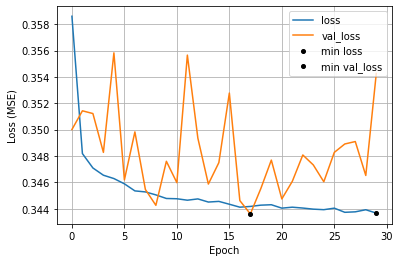

Minimun Loss : 29    0.34367
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 17    0.343609
Name: val_loss, dtype: float64


In [42]:
plot_loss(history_tuned_sgd)

##RMSprop

In [43]:
from tensorflow.keras.optimizers import RMSprop
random
deeper_model_tuned_rmsprop = Sequential()
deeper_model_tuned_rmsprop.add(Dense(200, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model_tuned_rmsprop.add(Dense(100, kernel_initializer='normal', activation='relu'))
deeper_model_tuned_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

deeper_model_tuned_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

deeper_model_tuned_rmsprop.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [44]:
history_tuned_rmsprop = deeper_model_tuned_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=30, batch_size=8)

Epoch 1/30
81081/81081 [==============================] - 102s 1ms/step - loss: 0.3598 - val_loss: 0.3511
Epoch 2/30
81081/81081 [==============================] - 102s 1ms/step - loss: 0.3534 - val_loss: 0.3594
Epoch 3/30
81081/81081 [==============================] - 100s 1ms/step - loss: 0.3530 - val_loss: 0.3586
Epoch 4/30
81081/81081 [==============================] - 99s 1ms/step - loss: 0.3524 - val_loss: 0.3572
Epoch 5/30
81081/81081 [==============================] - 101s 1ms/step - loss: 0.3510 - val_loss: 0.3521
Epoch 6/30
81081/81081 [==============================] - 99s 1ms/step - loss: 0.3521 - val_loss: 0.3567
Epoch 7/30
81081/81081 [==============================] - 99s 1ms/step - loss: 0.3515 - val_loss: 0.3619
Epoch 8/30
81081/81081 [==============================] - 102s 1ms/step - loss: 0.3510 - val_loss: 0.3573
Epoch 9/30
81081/81081 [==============================] - 103s 1ms/step - loss: 0.3509 - val_loss: 0.3643
Epoch 10/30
81081/81081 [========================

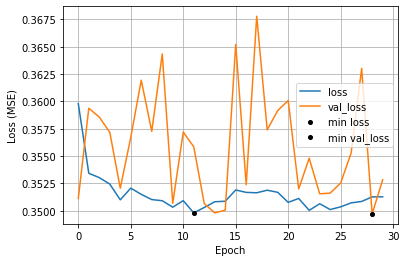

Minimun Loss : 11    0.349812
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 28    0.349715
Name: val_loss, dtype: float64


In [45]:
plot_loss(history_tuned_rmsprop)

#Kesimpulan :

##**Pada pengujian diatas, dimana Deeper Model diuji dengan ditambahkan optimizer dan didapatkan Adam yang terbaik pada pengujian ini dibandingkan RMSprop dan SGD. yang mana MSE didapatkan 0.30 dan paling kecil dibandingkan yang lain.**